In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [12]:
df = sm.datasets.co2.load_pandas().data

In [24]:
print(sm.datasets.co2.NOTE)

::

    Number of observations: 2225
    Number of variables: 2
    Variable name definitions:

        date - sample date in YYMMDD format
        co2 - CO2 Concentration ppmv

    The data returned by load_pandas contains the dates as the index.



/home/murasuu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/murasuu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

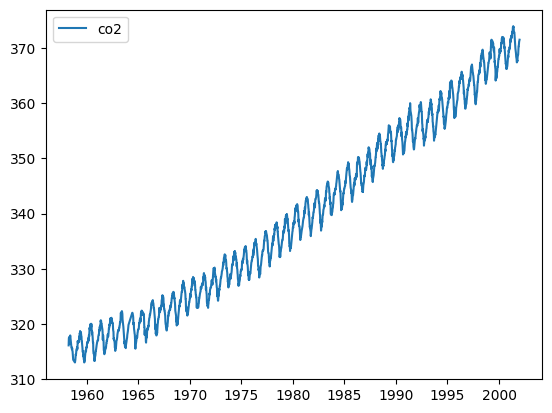

In [6]:
sns.lineplot(data=df)

Remover a tendencia da serie

<Axes: ylabel='co2'>

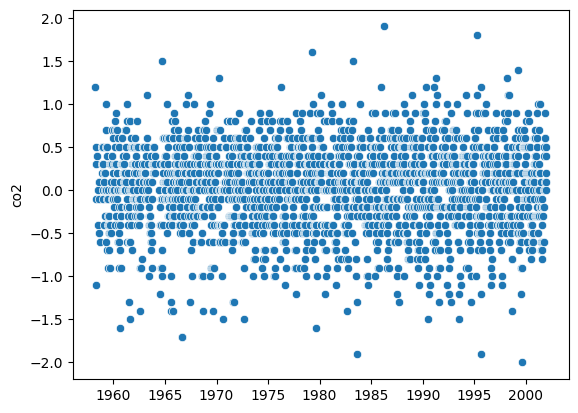

In [37]:
sns.scatterplot(data=df.diff(), x=df.index, y='co2') 

/home/murasuu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/murasuu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/murasuu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/murasuu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075:

<Axes: ylabel='Count'>

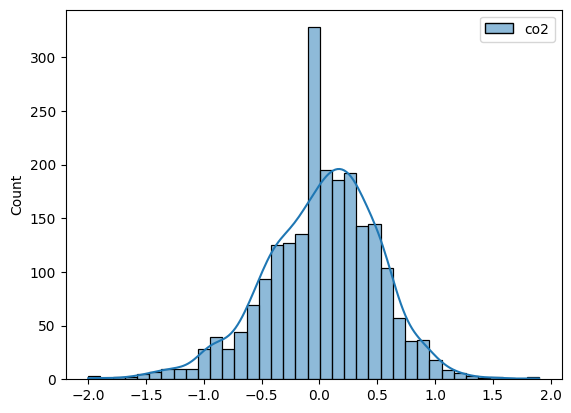

In [43]:
sns.histplot(data=df.diff(), kde=True)

Moving average

In [134]:
periodico = df['co2'].diff()
N = len(periodico)
t = np.arange(0,len(periodico))
def calc_a(x):
    return np.sum( (periodico - periodico.mean())*np.cos(t*x) )*2/N

def calc_b(x):
    return np.sum( (periodico - periodico.mean())*np.sin(t*x) )*2/N

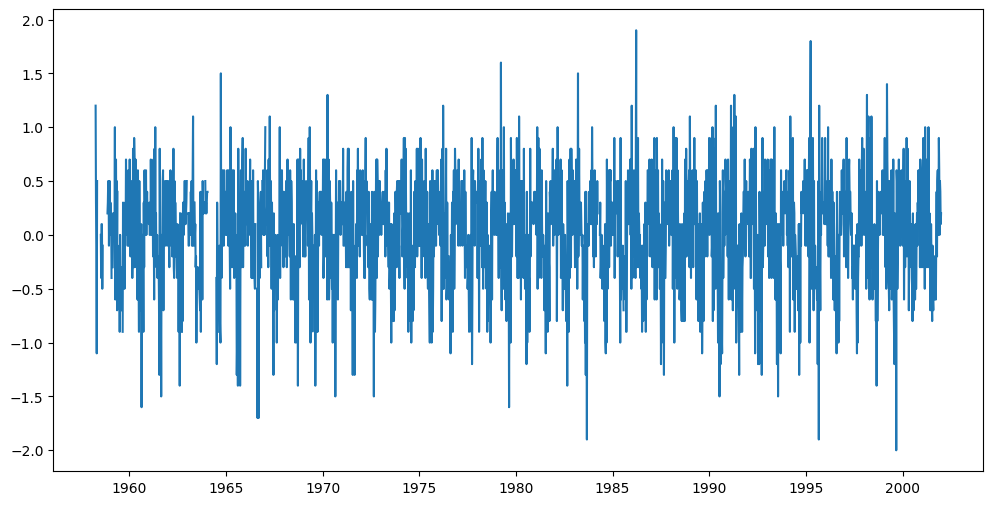

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['co2'].diff())

In [82]:
x = np.linspace(0, 5, 100)
y1 = []
y2 = []

for i in x:
    y1.append(calc_a(i))
    y2.append(calc_b(i))

y1 = np.array(y1)
y2 = np.array(y2)
y3 = y1**2+y2**2

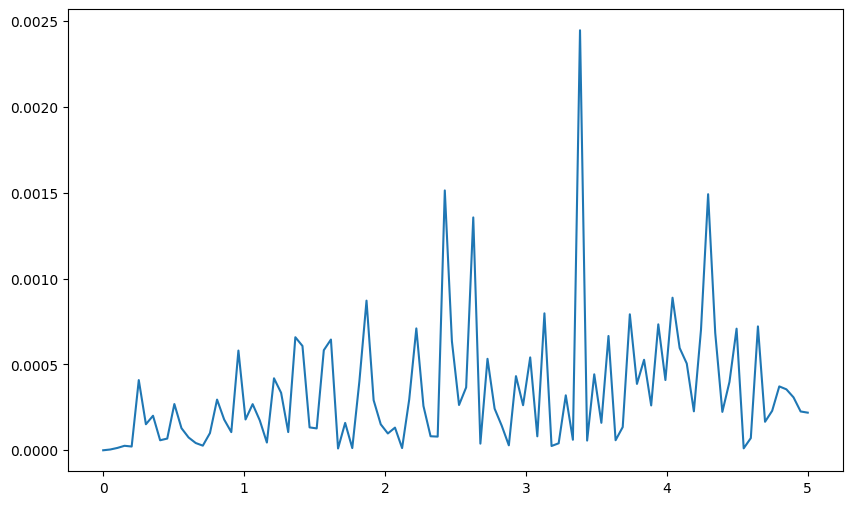

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y3)

In [90]:
y3[ y3 < 0.0005]

array([3.78049130e-34, 4.57418536e-06, 1.37532565e-05, 2.61526071e-05,
       2.18771641e-05, 4.08845808e-04, 1.51637723e-04, 2.01180571e-04,
       5.83216341e-05, 6.82500764e-05, 2.69407188e-04, 1.28683920e-04,
       7.45411349e-05, 4.23016745e-05, 2.69709846e-05, 1.00092049e-04,
       2.95276294e-04, 1.78908524e-04, 1.05742442e-04, 1.79473954e-04,
       2.68773418e-04, 1.74458269e-04, 4.50104339e-05, 4.19422815e-04,
       3.34729509e-04, 1.06057077e-04, 1.33291662e-04, 1.27396051e-04,
       1.05761691e-05, 1.59462669e-04, 1.26801253e-05, 4.02418211e-04,
       2.91802670e-04, 1.51256920e-04, 9.79032229e-05, 1.31987022e-04,
       1.27783990e-05, 2.95986841e-04, 2.58166410e-04, 8.16786853e-05,
       7.96823464e-05, 2.63821839e-04, 3.66347723e-04, 3.86913505e-05,
       2.42568756e-04, 1.43148935e-04, 2.87786495e-05, 4.32060961e-04,
       2.62493174e-04, 8.13073570e-05, 2.49531727e-05, 4.06586003e-05,
       3.20150769e-04, 6.12959657e-05, 5.65516028e-05, 4.42559051e-04,
      

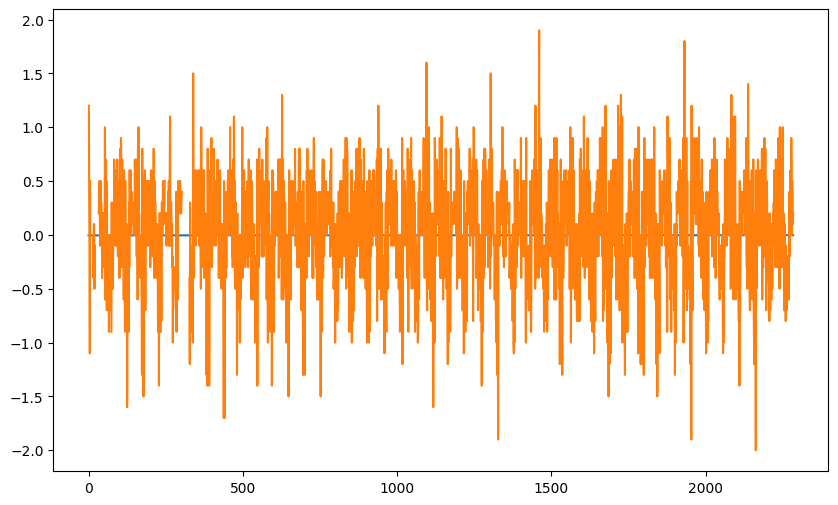

In [124]:
a = calc_a(4)
b = calc_b(4)

X = a*np.cos(t*0.00025)+b*np.sin(t*0.00025)

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(t, X)
plt.plot(t, periodico)

In [94]:
t.shape

(2284,)

In [126]:
X[:5]

array([-0.00450977, -0.00450923, -0.00450868, -0.00450814, -0.0045076 ])

In [114]:
periodico[:5]

1958-03-29    NaN
1958-04-05    1.2
1958-04-12    0.3
1958-04-19   -0.1
1958-04-26   -1.1
Freq: W-SAT, Name: co2, dtype: float64

In [130]:
periodico - periodico.mean()

1958-03-29         NaN
1958-04-05    1.174478
1958-04-12    0.274478
1958-04-19   -0.125522
1958-04-26   -1.125522
                ...   
2001-12-01   -0.025522
2001-12-08    0.474478
2001-12-15    0.374478
2001-12-22    0.074478
2001-12-29    0.174478
Freq: W-SAT, Name: co2, Length: 2284, dtype: float64

In [144]:
np.sum( (periodico - periodico.mean())*np.cos(t*3) )*2/N

-0.016930197754228524